## Overview of Business Problem

Consider a bank who wants to launch its insurance product to target the customers with high probability. They are unaware of which customer would opt for this product.

In this case the bank will retrieve the data of the customer from their previous interactions and leverage machine learning
algorithms like Logistic regression to predict which customer will be interested in the insurance and which will not.

Agenda :

1.Importing the dataset

2.Missing value Analysis

3.Feature selection  feature -->independent variables    target-->dependent variable
      
      1.Chi-Square test
       
      2.IV-Score Analysis
      
      3.VIF 

4.Model fitting

# Importing the data

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [ ]:
data=pd.read_csv(r'C:\Users\Dell\Downloads\bank-additional-full.csv', sep=';')

In [ ]:
data.head(20)

In [ ]:
data.shape

In [ ]:
data.info()

In [ ]:
data['job'].value_counts()

In [ ]:
data['contact'].unique()

In [ ]:
data.describe()

In [ ]:
data.dtypes

In [ ]:
c=data['marital'].value_counts().tolist()
c

In [ ]:
col=list(data.columns)
col

In [ ]:
data.isnull().sum()

# Boxplot

Using boxplot we will be visualizing the outliers,after that we will be using IQR method and handling the outliers.

with the help of boxplot we can visualize that 'age','duration','campaign','cons.conf.idx' columns has a outlier.

In [ ]:
for col_name in col:
    if(data[col_name].dtypes=='int64' or data[col_name].dtypes=='float64'):
        sns.boxplot(data[col_name])
        plt.xlabel(col_name)
        plt.ylabel('count')
        plt.show()

In [ ]:
#handling outliers

col_names=['age','duration','campaign','cons.conf.idx']
Q1 = data.age.quantile(0.25)
Q3 = data.age.quantile(0.75)
IQR = Q3 - Q1
data = data[(data.age >= Q1 - 1.5*IQR) & (data.age <= Q3 + 1.5*IQR)]


Q1 = data.duration.quantile(0.25)
Q3 = data.duration.quantile(0.75)
IQR = Q3 - Q1
data = data[(data.duration >= Q1 - 1.5*IQR) & (data.duration <= Q3 + 1.5*IQR)]

Q1 = data.campaign.quantile(0.25)
Q3 = data.campaign.quantile(0.75)
IQR = Q3 - Q1
data = data[(data.campaign >= Q1 - 1.5*IQR) & (data.campaign <= Q3 + 1.5*IQR)]

Q1 = data['cons.conf.idx'].quantile(0.25)
Q3 = data['cons.conf.idx'].quantile(0.75)
IQR = Q3 - Q1
data = data[(data['cons.conf.idx'] >= Q1 - 1.5*IQR) & (data['cons.conf.idx'] <= Q3 + 1.5*IQR)]

In [ ]:
 sns.boxplot(data['age'])
 plt.show()   

In [ ]:
for col_name in col:
    if(data[col_name].dtypes=='int64' or data[col_name].dtypes=='float64'):
        sns.boxplot(data[col_name])
        plt.xlabel(col_name)
        plt.ylabel('count')
        plt.show()

So we are done with Handling outliers so once again we'll plot the box plot and check the difference before and after.

From the above box plot we can visualize that all the outliers have been removed .

# Missing Value Analysis


Checking for missing values and replacing the respective numerical and categorical values with mean/median and mode

In [ ]:
#Checking for missing values and replacing the respective numerical and categorical values with mean/median and mode

data.isna().sum()

In [ ]:
data['y']

In [ ]:

data['y'] = np.where(data['y'] == 'yes',1,0)
data['y'].dtype

In [ ]:
data['y'] = data['y'].astype(str)

In [ ]:
data.dtypes

In [ ]:
#taking all columns in single list
col_list = list(data.columns)

In [ ]:
data.columns

In [ ]:
col_list

In [ ]:

for col in col_list:
    if data[col].dtypes=='object':
        #print('ob')
        data[col] = data[col].fillna(data[col].mode()[0])
    else:
        #print('num')
        data[col] = data[col].fillna(data[col].mean())

In [ ]:
data.tail()

After replacing with mean/median and mode ,we can check for the null values again and check the result

In [ ]:
data.isna().sum()

# Feature Selection

Why feature selection methods on the data?


because once you select a relevant features(independent attributes) ,then your model become more interpretable and model training speeds up and you'll end up with a efficient model.

In [ ]:
data.head()

In [ ]:
data['age'] = data.age.astype(int)

In [ ]:
# Binning
bins = [0,50,100]
data['age'] = pd.cut(data['age'], bins)

data['age'] = data.age.astype(str)

In [ ]:
pd.cut?

In [ ]:
data['age'].value_counts()/len(data['age'])

In [ ]:
data

In [ ]:
data.columns

In [ ]:
data.age.value_counts()

In [ ]:
data

# one hot encoding

In [ ]:
#one hot encoding
col_list = []
for col in data.columns:
    if ((data[col].dtype == 'object') & (col != 'y') ):
        col_list.append(col)

df_2 = pd.get_dummies(data[col_list],drop_first=True)

for col in df_2.columns:
    df_2[col] =  df_2[col].astype(int)
df_2.shape

In [ ]:
data

In [ ]:
df_2

In [ ]:
df_2.columns

In [ ]:
df_combined = pd.concat([data, df_2], axis=1)
df_combined.shape                                                                                  

In [ ]:
df_combined.head()

In [ ]:
col_list

In [ ]:
##Drop fields for which dummy vars already created
df_combined.drop(columns = col_list,axis = 1,inplace = True)

In [ ]:
df_combined.dtypes

In [ ]:
df_combined.head()

# Label Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
for i in col_list:
    data[i]=labelencoder.fit_transform(data[i])

In [ ]:
data.head()

## What is Multicollinearity Analysis ?

This is the process of occurrence of multiple intercorrelation among one or more independent variables

As collinearity analysis cannot find the hidden correlations, we use multicollinearity analysis.

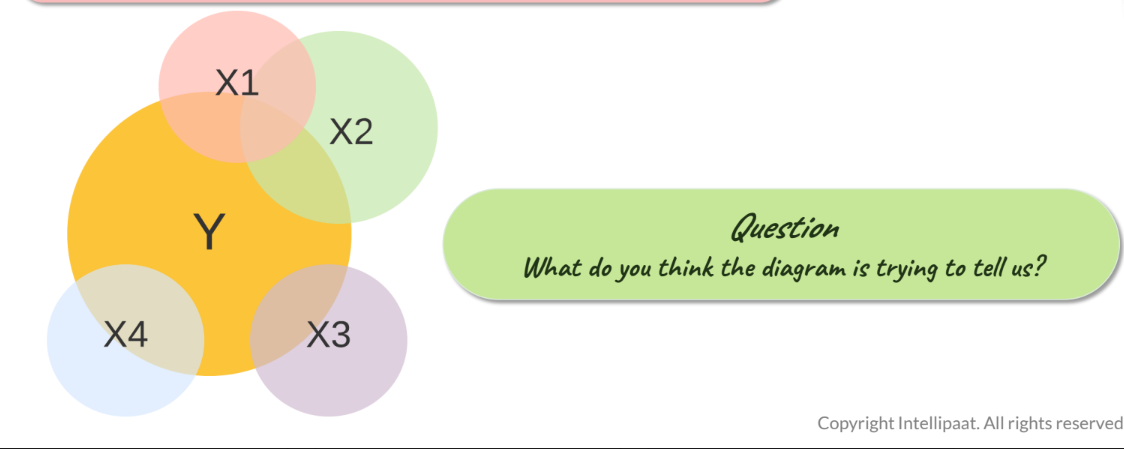

-> So, in the diagram we can see that Y has a correlation with X1, X2, X3 and X4.

-> We can also see that X1 and X2 also have a high correlation.

-> Think of overlap between these bubbles as correlation in variables.

-> This process helps to avoid overlap between these independent variables.

## Why Collinearity Analysis

-> Simply putting we first eliminate the highest correlated variable and then eliminate the next highest correlated variable.

-> The variables with high correlation can be removed by using VIF.

## VIF

A variance inflation factor (VIF) is  a measure of multicollinearity among the independent variables in a multiple regression model.


Finding  multicollinearity is important because while multicollinearity does not reduce the explanatory power of the model, it does reduce the statistical significance of the independent variables. 


A large variance inflation factor (VIF) on an independent variable indicates a highly collinear relationship to the other variables that should be considered or adjusted for in the structure of the model and selection of independent variables.


So we'll consider the VIF values <=5 ,rest all we'll remove the featuers with value >5.


In [ ]:


from statsmodels.stats.outliers_influence import variance_inflation_factor 
col_list = []
for col in data.columns:
    if ((data[col].dtype != 'object') & (col != 'y') ):
        col_list.append(col)

X = data[col_list]
vif_data = pd.DataFrame() 
vif_data["feature"] = X.columns 
vif_data["VIF"] = [variance_inflation_factor(X.values, i) 
                          for i in range(len(X.columns))] 
vif_data
#dset = dset.replace({'WoE': {np.inf: 0, -np.inf: 0}})

In [ ]:
X

In [ ]:
X.values


In [ ]:


from statsmodels.stats.outliers_influence import variance_inflation_factor 
col_list = []
for col in data.columns:
    if ((data[col].dtype != 'object') & (col != 'y') ):
        col_list.append(col)

X = data[col_list]
vif_data = pd.DataFrame() 
vif_data["feature"] = X.columns 
vif_data["VIF"] = [variance_inflation_factor(X.values, i) 
                          for i in range(len(X.columns))] 
vif_data


In [ ]:
data=data.drop(['nr.employed'], axis = 1)

In [ ]:


from statsmodels.stats.outliers_influence import variance_inflation_factor 
col_list = []
for col in data.columns:
    if ((data[col].dtype != 'object') & (col != 'y') ):
        col_list.append(col)

X = data[col_list]
vif_data = pd.DataFrame() 
vif_data["feature"] = X.columns 
vif_data["VIF"] = [variance_inflation_factor(X.values, i) 
                          for i in range(len(X.columns))] 
vif_data

In [ ]:
data=data.drop(['cons.price.idx'], axis = 1)

In [ ]:
col_list = []
for col in data.columns:
    if ((data[col].dtype != 'object') & (col != 'y') ):
        col_list.append(col)

X = data[col_list]
vif_data = pd.DataFrame() 
vif_data["feature"] = X.columns 
vif_data["VIF"] = [variance_inflation_factor(X.values, i) 
                          for i in range(len(X.columns))] 
vif_data

In [ ]:
col_list = []
for col in data.columns:
    if ((data[col].dtype != 'object') & (col != 'y') ):
        col_list.append(col)

X = data[col_list]
vif_data = pd.DataFrame() 
vif_data["feature"] = X.columns 
vif_data["VIF"] = [variance_inflation_factor(X.values, i) 
                          for i in range(len(X.columns))] 
vif_data

In [ ]:
data=data.drop(['pdays'], axis = 1)

In [ ]:
col_list = []
for col in data.columns:
    if ((data[col].dtype != 'object') & (col != 'y') ):
        col_list.append(col)

X = data[col_list]
vif_data = pd.DataFrame() 
vif_data["feature"] = X.columns 
vif_data["VIF"] = [variance_inflation_factor(X.values, i) 
                          for i in range(len(X.columns))] 
print(vif_data)

In [ ]:
data=data.drop(['euribor3m'], axis = 1)

In [ ]:
col_list = []
for col in data.columns:
    if ((data[col].dtype != 'object') & (col != 'y') ):
        col_list.append(col)

X = data[col_list]
vif_data = pd.DataFrame() 
vif_data["feature"] = X.columns 
vif_data["VIF"] = [variance_inflation_factor(X.values, i) 
                          for i in range(len(X.columns))] 
print(vif_data)

In [ ]:
data=data.drop(['cons.conf.idx'], axis = 1)

In [ ]:
col_list = []
for col in data.columns:
    if ((data[col].dtype != 'object') & (col != 'y') ):
        col_list.append(col)

X = data[col_list]
vif_data = pd.DataFrame() 
vif_data["feature"] = X.columns 
vif_data["VIF"] = [variance_inflation_factor(X.values, i) 
                          for i in range(len(X.columns))] 
print(vif_data)

In [ ]:
data=data.drop(['poutcome'], axis = 1)

In [ ]:
col_list = []
for col in data.columns:
    if ((data[col].dtype != 'object') & (col != 'y') ):
        col_list.append(col)

X = data[col_list]
vif_data = pd.DataFrame() 
vif_data["feature"] = X.columns 
vif_data["VIF"] = [variance_inflation_factor(X.values, i) 
                          for i in range(len(X.columns))] 
print(vif_data)

In [ ]:
data

# Model building

In [ ]:
Ind_Features = list(data.columns)
Ind_Features.remove('y')
x = data[Ind_Features]
y = data['y']

In [ ]:
data

In [ ]:
y

In [ ]:
x

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

In [ ]:
pd.DataFrame(x_train)

In [ ]:
pd.DataFrame(x_test)

In [ ]:
y_train

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logisticRegr = LogisticRegression()

In [ ]:
#####Model Fitting/Training###
logisticRegr.fit(x_train, y_train)

In [ ]:
test_pred = logisticRegr.predict(x_test)

In [ ]:
test_pred

In [ ]:
pred = pd.DataFrame() 
pred["y_test"] = y_test
pred["y_pred"] = test_pred
pred

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,test_pred)

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
c1=confusion_matrix(y_test,test_pred)

In [ ]:
c1